In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import seaborn as sns

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.set_printoptions(suppress=True) 
DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame 
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS) 

In [3]:
data = pd.read_csv("session_2_homework_data.csv")
#data.set_index("Date",inplace = True)
data_input = data.loc[:,'USGG3M':'USGG30YR']
# display data (index is 'Date')
data

,Date,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR,Output1,Easing,Tightening
0,1/5/1981,13.5200,13.0900,12.2890,12.2800,12.2940,12.1520,11.6720,18.015526,NaN,NaN
1,1/6/1981,13.5800,13.1600,12.4290,12.3100,12.2140,12.1120,11.6720,18.091398,NaN,NaN
2,1/7/1981,14.5000,13.9000,12.9290,12.7800,12.6140,12.3820,11.8920,19.447314,NaN,NaN
3,1/8/1981,14.7600,14.0000,13.0990,12.9500,12.6840,12.3520,11.9120,19.748510,NaN,NaN
4,1/9/1981,15.2000,14.3000,13.5390,13.2800,12.8840,12.5720,12.1320,20.572042,NaN,NaN
5,1/12/1981,15.2200,14.2300,13.1790,12.9400,12.7140,12.4520,12.0820,20.142185,NaN,NaN
6,1/13/1981,15.2400,14.1000,13.3090,12.9700,12.6840,12.5320,12.0820,20.181543,NaN,NaN
7,1/14/1981,15.0800,13.9000,12.9590,12.7500,12.6140,12.5320,12.0720,19.777288,NaN,NaN
8,1/15/1981,15.2500,14.0900,13.2590,13.0200,12.7740,12.6220,12.2520,20.298884,NaN,NaN
9,1/16/1981,15.1500,13.9800,13.0890,12.8500,12.6640,12.5320,12.1320,19.967575,NaN,NaN


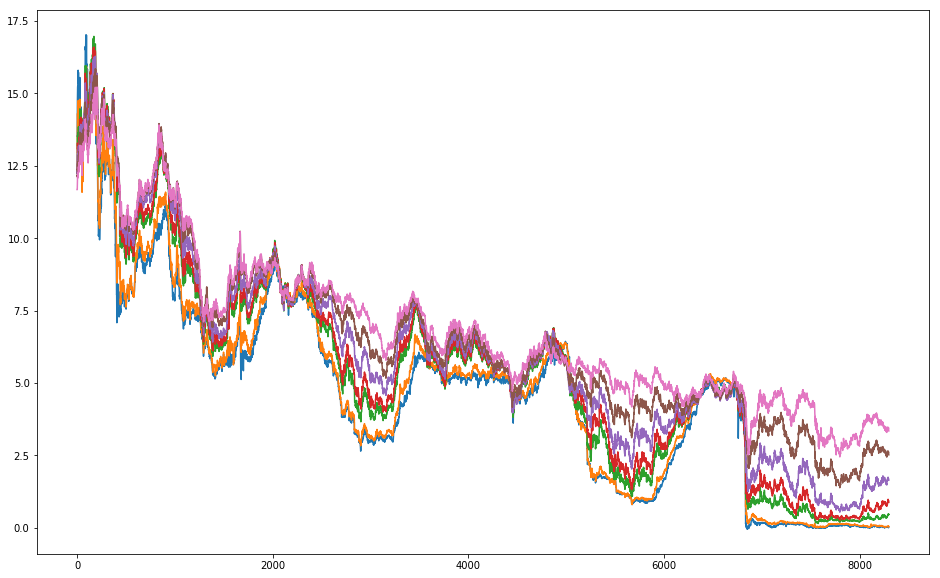

In [4]:
fig, ax = plt.subplots(figsize=(16, 10))  # creating fig and subplots with size
plt.plot(data_input)
plt.show()

In [5]:
# Make OLS regressions with each variable
input_v = ["USGG3M","USGG6M","USGG2YR","USGG3YR","USGG5YR","USGG10YR","USGG30YR"]
table_coef = pd.DataFrame(columns=input_v, index=['Intercept','Slope'])

for i in range(7):
    print("\n%d. Regression results of variable: %s" %(i+1,input_v[i]))
    Y = data['Output1']
    X = data_input[input_v[i]]
    X = sm.add_constant(X)
    regr = sm.OLS(Y, X, missing='drop')
    results = regr.fit()
    table_coef[input_v[i]][0] = results.params[0]
    table_coef[input_v[i]][1] = results.params[1]
    print(results.summary())


1. Regression results of variable: USGG3M
                            OLS Regression Results                            
Dep. Variable:                Output1   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.148e+05
Date:                Wed, 07 Feb 2018   Prob (F-statistic):               0.00
Time:                        03:24:25   Log-Likelihood:                -16133.
No. Observations:                8300   AIC:                         3.227e+04
Df Residuals:                    8298   BIC:                         3.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [6]:
print(table_coef)

            USGG3M   USGG6M  USGG2YR  USGG3YR  USGG5YR USGG10YR USGG30YR
Intercept -11.7232 -12.0975 -13.0558 -13.8616 -15.4366 -18.0634 -21.0859
Slope      2.50756  2.49723  2.40045  2.45579  2.56874  2.78699  3.06956


In [7]:
# 2.2
table_coef2 = pd.DataFrame(columns=input_v, index=['Intercept','Slope'])
for i in range(7):
    print("\n%d. Regression results of 'output1' as input and '%s' as output" %(i+1,input_v[i]))
    X = data['Output1']
    Y = data_input[input_v[i]]
    X = sm.add_constant(X)
    regr = sm.OLS(Y, X, missing='drop')
    results = regr.fit()
    table_coef2[input_v[i]][0] = results.params[0]
    table_coef2[input_v[i]][1] = results.params[1]
    print(results.summary())


1. Regression results of 'output1' as input and 'USGG3M' as output
                            OLS Regression Results                            
Dep. Variable:                 USGG3M   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.148e+05
Date:                Wed, 07 Feb 2018   Prob (F-statistic):               0.00
Time:                        03:24:27   Log-Likelihood:                -8345.2
No. Observations:                8300   AIC:                         1.669e+04
Df Residuals:                    8298   BIC:                         1.671e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [8]:
print(table_coef2)

             USGG3M    USGG6M   USGG2YR   USGG3YR   USGG5YR  USGG10YR  \
Intercept   4.67513   4.84437   5.43889   5.64446   6.00942   6.48132   
Slope      0.383961  0.390187  0.415185  0.406354  0.386061  0.347754   

           USGG30YR  
Intercept   6.86936  
Slope      0.304712  


In [9]:
# 3. Logistic Regression
data.loc[data['Easing'] == 1 , "Binary"] = 0
data.loc[data['Tightening']==1, "Binary"] = 1
#Log_data = data.dropna()
Log_data = data.dropna(subset=['Binary'])
Log_data = Log_data.reset_index()
Log_data

,index,Date,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR,Output1,Easing,Tightening,Binary
0,208,11/2/1981,12.690,12.870,14.119,14.4400,14.614,14.572,14.412,21.820650,1.0,NaN,0.0
1,209,11/4/1981,12.300,12.500,14.119,14.1300,14.324,14.182,13.962,21.015864,1.0,NaN,0.0
2,210,11/5/1981,12.180,12.590,14.209,14.2300,14.434,14.192,14.062,21.159323,1.0,NaN,0.0
3,211,11/6/1981,11.680,12.200,13.869,13.8800,14.074,13.942,13.852,20.241872,1.0,NaN,0.0
4,212,11/9/1981,11.190,11.630,13.179,13.2500,13.544,13.392,13.562,18.804600,1.0,NaN,0.0
5,213,11/10/1981,11.150,11.570,13.229,13.2300,13.634,13.402,13.552,18.813639,1.0,NaN,0.0
6,214,11/12/1981,10.600,11.250,12.779,12.8500,13.234,13.192,13.212,17.805298,1.0,NaN,0.0
7,215,11/13/1981,10.780,11.310,12.839,12.9300,13.314,13.182,13.262,17.997884,1.0,NaN,0.0
8,216,11/16/1981,10.630,11.100,12.699,12.7900,13.214,13.072,13.112,17.620769,1.0,NaN,0.0
9,217,11/17/1981,10.630,11.080,12.719,12.8500,13.214,13.182,13.252,17.726563,1.0,NaN,0.0


In [10]:
print(len(Log_data))
print(Log_data.sum())

2358
index                                                   3735113
Date          11/2/198111/4/198111/5/198111/6/198111/9/19811...
USGG3M                                                  17841.6
USGG6M                                                  18523.7
USGG2YR                                                   20726
USGG3YR                                                 21214.1
USGG5YR                                                 22010.5
USGG10YR                                                22742.3
USGG30YR                                                22970.9
Output1                                                 19565.4
Easing                                                     1585
Tightening                                                  773
Binary                                                      773
dtype: object


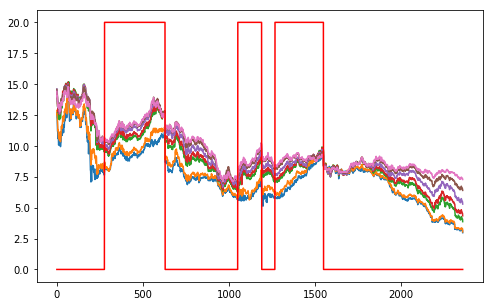

In [11]:
fig, ax = plt.subplots(figsize=(8,5))  # creating fig and subplots with size
plt.plot(Log_data.loc[:,'USGG3M':'USGG30YR'])
plt.plot(Log_data.Binary*20, color = 'red')
plt.show()

In [12]:
# 2.1 Logistic Regression with 3M yields as predictors for easing/tightening output. 
# Implementing the Logistic Regression Model
X = Log_data['USGG3YR']
y = Log_data['Binary']
logit_model = sm.Logit(y,X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.651971
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 Binary   No. Observations:                 2358
Model:                          Logit   Df Residuals:                     2357
Method:                           MLE   Df Model:                            0
Date:                Wed, 07 Feb 2018   Pseudo R-squ.:                -0.03058
Time:                        03:24:35   Log-Likelihood:                -1537.3
converged:                       True   LL-Null:                       -1491.7
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
USGG3YR       -0.0635      0.005    -13.565      0.000      -0.073      -0.054


In [15]:
# Logistic Regression Model Fitting
from sklearn.metrics import confusion_matrix
X = X.reshape(-1,1)
def log_model_fit(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    modelCV = LogisticRegression()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
    print("\n10-fold cross validation average accuracy: %.3f" % (results.mean()))
    confusion_matrix1 = confusion_matrix(y_test, y_pred)
    print('\nThe Confusion_matrix is: ')
    print(confusion_matrix1)
    print('\nThe Classification Report is: ')
    print(classification_report(y_test, y_pred))
log_model_fit(X, y)

Accuracy of logistic regression classifier on test set: 0.60

10-fold cross validation average accuracy: 0.603

The Confusion_matrix is: 
[[423  44]
 [238   3]]

The Classification Report is: 
             precision    recall  f1-score   support

        0.0       0.64      0.91      0.75       467
        1.0       0.06      0.01      0.02       241

avg / total       0.44      0.60      0.50       708



In [16]:
# 2.2 Logistic Regression with all inputs
# Implementing the Logistic Regression Model
X_2 = Log_data.loc[:,'USGG3M':'USGG30YR']
y_2 = Log_data['Binary']
logit_model2 = sm.Logit(y_2,X_2).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.586166
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Binary   No. Observations:                 2358
Model:                          Logit   Df Residuals:                     2351
Method:                           MLE   Df Model:                            6
Date:                Wed, 07 Feb 2018   Pseudo R-squ.:                 0.07344
Time:                        03:28:08   Log-Likelihood:                -1382.2
converged:                       True   LL-Null:                       -1491.7
                                        LLR p-value:                 1.621e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
USGG3M        -3.1463      0.263    -11.979      0.000      -3.661      -2.631
USGG6M         3.0267      0.

In [17]:
# Logistic Regression Model Fitting
from sklearn.metrics import confusion_matrix
log_model_fit(X_2, y_2)

Accuracy of logistic regression classifier on test set: 0.67

10-fold cross validation average accuracy: 0.676

The Confusion_matrix is: 
[[434  33]
 [200  41]]

The Classification Report is: 
             precision    recall  f1-score   support

        0.0       0.68      0.93      0.79       467
        1.0       0.55      0.17      0.26       241

avg / total       0.64      0.67      0.61       708



In [20]:
# PCA
# 4.1 Correlation Matrix
X = Log_data.loc[:,'USGG3M':'USGG30YR']
y = Log_data['Binary']
corr_3v = Log_data[['USGG3M','USGG2YR','USGG5YR']]
corr_3v.corr()
# print(corr_3v.corr())

,USGG3M,USGG2YR,USGG5YR
USGG3M,1.000000,0.954772,0.907080
USGG2YR,0.954772,1.000000,0.986146
USGG5YR,0.907080,0.986146,1.000000


In [22]:
# 4.2 Covariation Matrix (not standardize yet)
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)
cov_mat

,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR
USGG3M,4.455545,4.565547,4.792419,4.611645,4.232923,3.806033,3.396435
USGG6M,4.565547,4.743420,5.058982,4.886997,4.511619,4.078211,3.651447
USGG2YR,4.792419,5.058982,5.654698,5.518657,5.184302,4.761191,4.314839
USGG3YR,4.611645,4.886997,5.518657,5.407157,5.108481,4.714714,4.290817
USGG5YR,4.232923,4.511619,5.184302,5.108481,4.887524,4.553939,4.179495
USGG10YR,3.806033,4.078211,4.761191,4.714714,4.553939,4.285757,3.964465
USGG30YR,3.396435,3.651447,4.314839,4.290817,4.179495,3.964465,3.698785


In [24]:
# 3 Perform the PCA
# Standardize Data
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)


# Covariance Matrix (Standardized)
mean_vec_s = np.mean(standardisedX, axis=0)
cov_mat_s = (standardisedX - mean_vec_s).T.dot((standardisedX - mean_vec_s)) / (standardisedX.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)
cov_mat_s

,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR
USGG3M,1.000424,0.993530,0.955177,0.939951,0.907465,0.871350,0.837004
USGG6M,0.993530,1.000424,0.977230,0.965375,0.937403,0.904887,0.872115
USGG2YR,0.955177,0.977230,1.000424,0.998455,0.986564,0.967568,0.943875
USGG3YR,0.939951,0.965375,0.998455,1.000424,0.994139,0.979809,0.959865
USGG5YR,0.907465,0.937403,0.986564,0.994139,1.000424,0.995436,0.983409
USGG10YR,0.871350,0.904887,0.967568,0.979809,0.995436,1.000424,0.996152
USGG30YR,0.837004,0.872115,0.943875,0.959865,0.983409,0.996152,1.000424


In [25]:
standardisedX.apply(np.mean)

USGG3M      4.339192e-16
USGG6M      4.821325e-17
USGG2YR     1.446397e-16
USGG3YR     2.410662e-16
USGG5YR     4.339192e-16
USGG10YR    3.857060e-16
USGG30YR    9.642650e-17
dtype: float64

In [26]:
standardisedX.apply(np.std)

USGG3M      1.0
USGG6M      1.0
USGG2YR     1.0
USGG3YR     1.0
USGG5YR     1.0
USGG10YR    1.0
USGG30YR    1.0
dtype: float64

In [27]:
pca = PCA().fit(standardisedX)
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1,len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop","Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
        print("")
    return summary
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.589302,0.957784,0.957784
PC2,0.522516,0.039003,0.996787
PC3,0.133210,0.002535,0.999322
PC4,0.051347,0.000377,0.999699
PC5,0.036515,0.000190,0.999889
PC6,0.021050,0.000063,0.999953
PC7,0.018231,0.000047,1.000000


In [28]:
summary.sdev

,Standard deviation
PC1,2.589302
PC2,0.522516
PC3,0.133210
PC4,0.051347
PC5,0.036515
PC6,0.021050
PC7,0.018231


In [29]:
np.sum(summary.sdev**2)

Standard deviation    7.0
dtype: float64

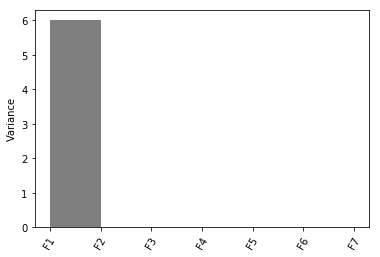

In [30]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y))
    plt.hist(y,x,facecolor='black', alpha=0.5)
    plt.xticks(x, ["F"+str(i+1) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
screeplot(pca, standardisedX)

In [31]:
summary.sdev**2

,Standard deviation
PC1,6.704487
PC2,0.273023
PC3,0.017745
PC4,0.002637
PC5,0.001333
PC6,0.000443
PC7,0.000332


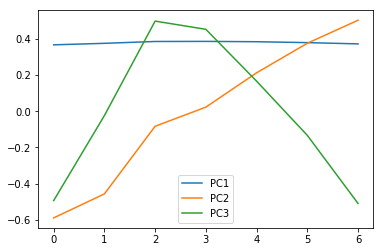

In [32]:
plt.plot(pca.components_[0], label = 'PC1')
plt.plot(pca.components_[1], label = 'PC2')
plt.plot(pca.components_[2], label = 'PC3')
plt.legend()
plt.show()

In [33]:
# Eigenvectors and Eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat_s)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.36644748  0.58879988  0.49328661 -0.52437684 -0.01055901 -0.02273434
  -0.00999284]
 [-0.3747331   0.45620879  0.0240174   0.79449088  0.13700018 -0.02129475
   0.02082156]
 [-0.38489948  0.08294423 -0.4973998  -0.10829117 -0.48549502  0.45125226
  -0.38275983]
 [-0.3854156  -0.02252605 -0.4520634  -0.15955706 -0.14117685 -0.63165908
   0.44967047]
 [-0.38358056 -0.21199076 -0.16594249 -0.16532399  0.67149719  0.46298271
   0.296303  ]
 [-0.37857967 -0.37514551  0.13310751 -0.00671003  0.27154569 -0.39649293
  -0.68354732]
 [-0.37167451 -0.50212234  0.5089883   0.17102837 -0.44814908  0.15763331
   0.3093955 ]]

Eigenvalues 
[ 6.70733107  0.27313897  0.0177525   0.00263764  0.00133392  0.00033251
  0.00044327]


In [34]:
def calcpc(variables, loadings):     
    # find the number of samples in the data set and the number of variables     
    numsamples, numvariables = variables.shape     
    # make a vector to store the component     
    pc = np.zeros(numsamples)     
    # calculate the value of the component for each sample     
    for i in range(numsamples):         
        valuei = 0         
        for j in range(numvariables):            
            valueij = variables.iloc[i, j]             
            loadingj = loadings[j]             
            valuei = valuei + (valueij * loadingj)         
        pc[i] = valuei     
    return pc 

def calmean3(variables, loadings):
    print('The mean of First(zero) loading is: %d')
    display(np.mean(loadings[0]))
    print('Value of First Loading:')
    display(calcpc(variables, loadings[0]))
    print('Value of Second Loading:')
    display(calcpc(variables, loadings[1]))
    print('Value of Thrid Loading: ')
    display(calcpc(variables, loadings[2]))
    print('Value of First 3 Factors: ')
    factor = pd.DataFrame(list(pca.transform(variables)))
    factor = factor.iloc[:,0:3]
    factor.columns = ['Factor1', 'Factor2', 'Factor3']
    display(factor)

calmean3(standardisedX, pca.components_) 


The mean of First(zero) loading is: %d


0.3779043428409179

Value of First Loading:


array([ 6.23804152,  5.84660838,  5.91265714, ..., -4.72827112,
       -4.74858293, -4.9656238 ])

Value of Second Loading:


array([ 0.00579792, -0.02688895,  0.02404089, ...,  0.73888931,
        0.73869471,  0.79697122])

Value of Thrid Loading: 


array([-0.23625551, -0.07886523, -0.03238996, ..., -0.23618313,
       -0.23772535, -0.25145984])

Value of First 3 Factors: 


,Factor1,Factor2,Factor3
0,6.238042,0.005798,-0.236256
1,5.846608,-0.026889,-0.078865
2,5.912657,0.024041,-0.032390
3,5.496856,0.119044,-0.005768
4,4.848894,0.166895,-0.079462
5,4.851917,0.196521,-0.054117
6,4.391945,0.263821,-0.016590
7,4.478221,0.218628,-0.037803
8,4.303692,0.239305,-0.017665
9,4.360616,0.299876,-0.045727


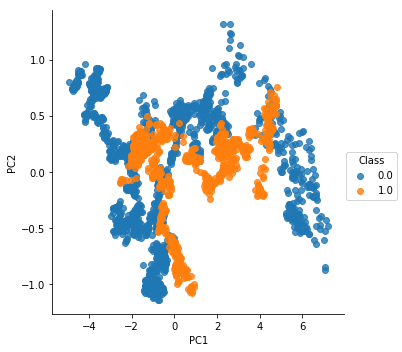

In [35]:
# Perform PCA
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)
pca_scatter(pca, standardisedX, y)
plt.show()